## **0. Ajustes previos e importación de librerías**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional



# Ajuste de visualización de los dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Fijación de semillas de reproducibilidad para la etapa del modelado
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

## **1. Estudio descriptivo**


1.1. Importación de librerías

In [2]:
# Lectura de datos

# Dataframe de train
df_train = pd.read_csv('train.csv')
df_train.head()



,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [3]:
# Dataframe de test
df_test = pd.read_csv('test.csv')
df_test.head()



,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


1.2. Información general del dataset

In [4]:
# Información básica
# Dataset de train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [5]:
# Dataset de test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                17520 non-null  int64  
 1   Month               17520 non-null  int64  
 2   Day                 17520 non-null  int64  
 3   Hour                17520 non-null  int64  
 4   Minute              17520 non-null  int64  
 5   Cloud Type          17520 non-null  int64  
 6   Dew Point           17520 non-null  float64
 7   Temperature         17520 non-null  float64
 8   Pressure            17520 non-null  int64  
 9   Relative Humidity   17520 non-null  float64
 10  Solar Zenith Angle  17520 non-null  float64
 11  Precipitable Water  17520 non-null  float64
 12  Wind Direction      17520 non-null  int64  
 13  Wind Speed          17520 non-null  float64
 14  Fill Flag           17520 non-null  int64  
 15  Clearsky DHI        0 non-null      float64
 16  Clea

In [6]:
# Verificación de valores nulos
# Dataset de training
df_train.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [7]:
# Dataset de test
df_test.isnull().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [8]:
# Distribución de los tipos de datos
# Dataset de training
df_train.dtypes.value_counts()

int64      11
float64     7
Name: count, dtype: int64

In [9]:
# Dataset de test
df_test.dtypes.value_counts()

int64      9
float64    9
Name: count, dtype: int64

In [10]:
# Resumen estadístico
# Dataset de training
df_train.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [11]:
# Dataset de test
df_test.describe()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
count,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,0.0,0.0,0.0
mean,2019.0,6.526027,15.720548,11.500000,15.000000,2.715811,14.623550,19.929817,1006.751370,75.165104,89.701282,2.989498,184.470491,2.252871,5.148916,NaN,NaN,NaN
std,0.0,3.447950,8.796498,6.922384,15.000428,3.159985,7.273676,9.087679,4.742727,20.121986,40.089410,1.492317,97.672316,1.238956,18.812279,NaN,NaN,NaN
min,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,-8.700000,-4.800000,988.000000,16.870000,8.570000,0.300000,0.000000,0.100000,0.000000,NaN,NaN,NaN
25%,2019.0,4.000000,8.000000,5.750000,0.000000,0.000000,8.800000,13.000000,1003.000000,59.967500,56.432500,1.800000,92.000000,1.300000,0.000000,NaN,NaN,NaN
50%,2019.0,7.000000,16.000000,11.500000,15.000000,0.000000,16.600000,21.100000,1007.000000,79.235000,89.450000,3.000000,192.000000,2.000000,0.000000,NaN,NaN,NaN
75%,2019.0,10.000000,23.000000,17.250000,30.000000,7.000000,20.400000,26.400000,1010.000000,92.872500,123.040000,4.100000,265.000000,3.000000,0.000000,NaN,NaN,NaN
max,2019.0,12.000000,31.000000,23.000000,30.000000,9.000000,25.700000,38.700000,1023.000000,100.000000,171.540000,6.800000,360.000000,8.200000,100.000000,NaN,NaN,NaN


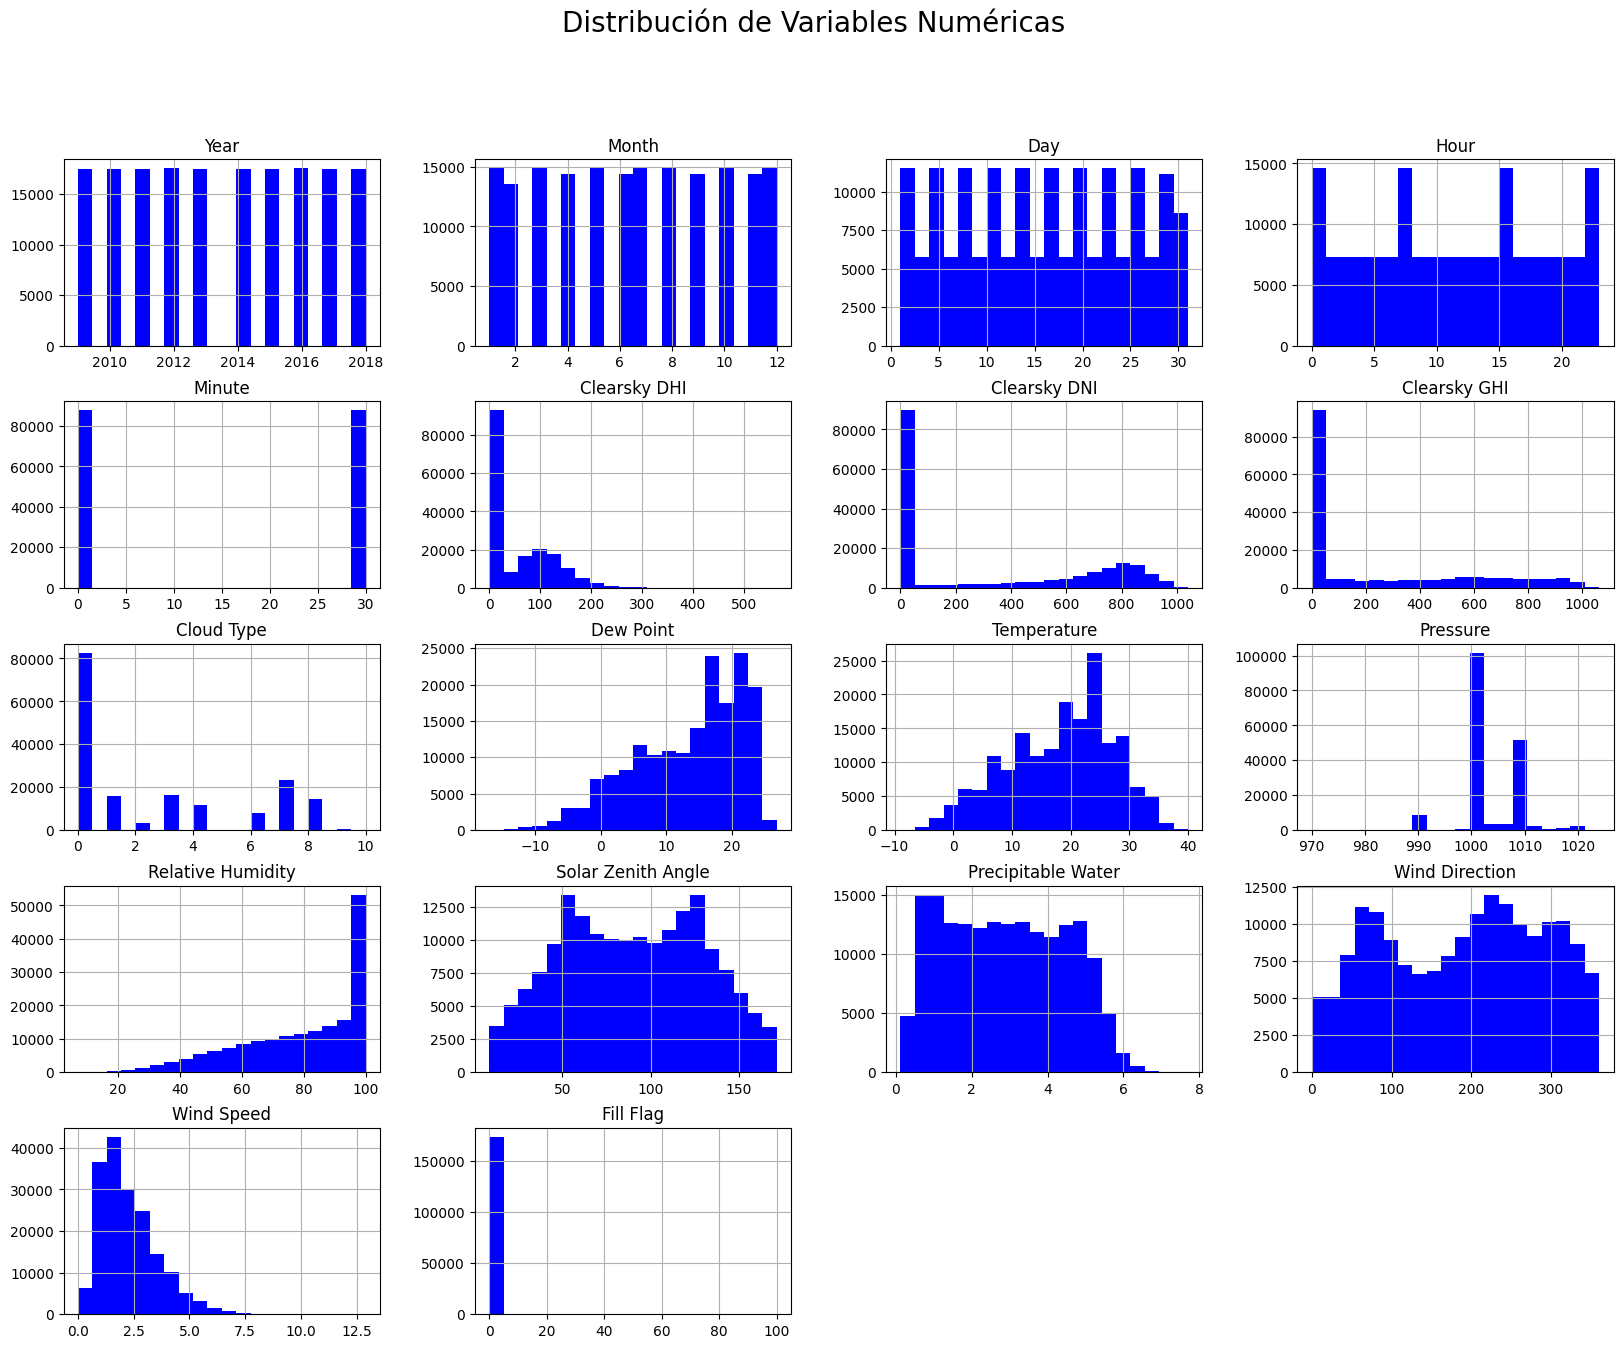

In [12]:
# Histograma de todas las variables numéricas
# Dataset de training
df_train.hist(bins=20, figsize=(20, 15), color='blue')
plt.suptitle('Distribución de Variables Numéricas', fontsize=20)
plt.show()

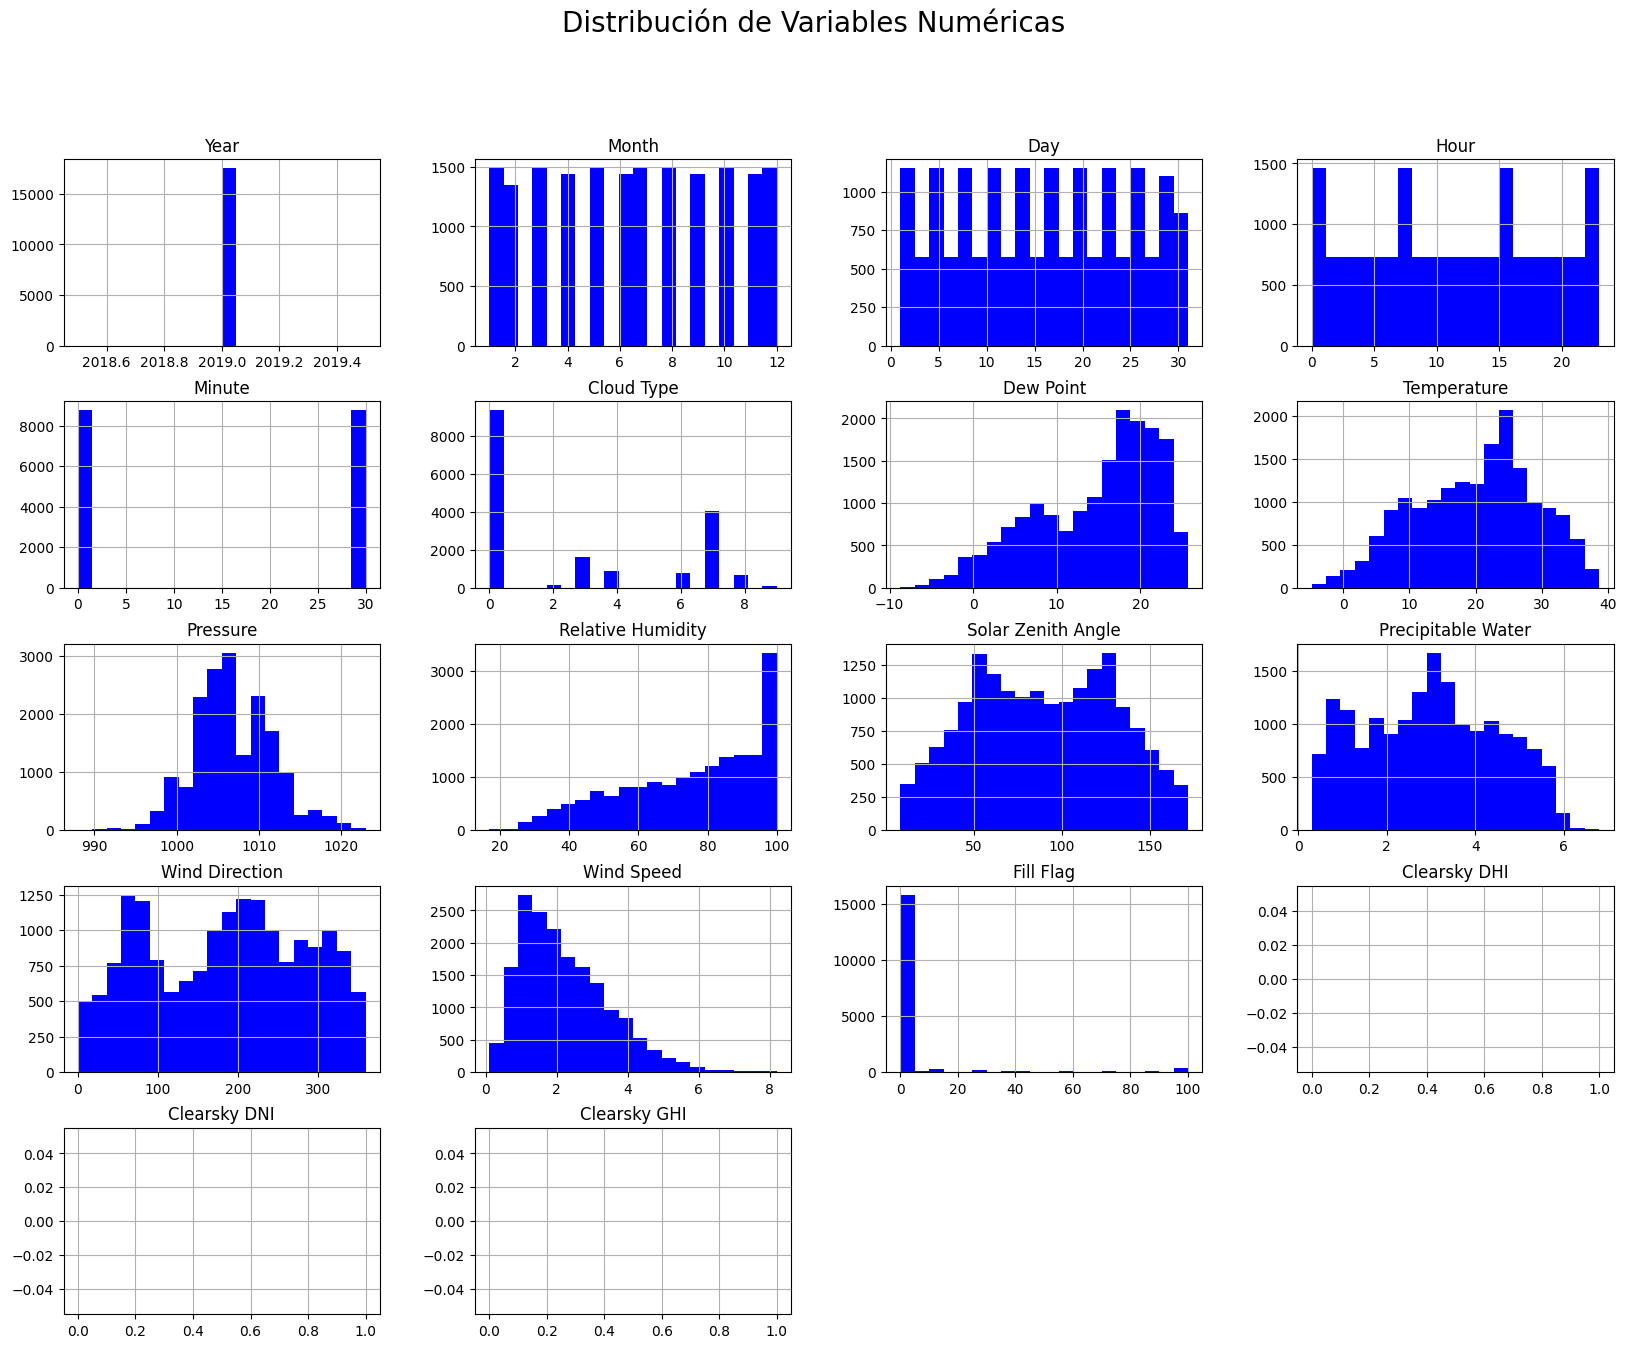

In [13]:
# Dataset de test
df_test.hist(bins=20, figsize=(20, 15), color='blue')
plt.suptitle('Distribución de Variables Numéricas', fontsize=20)
plt.show()

In [14]:
# Dado que el dataset contiene datos sobre hora, se creará una nueva columna denominada "datetime" que agrupe el año, mes, dia, hora y minuto

# Dataset de training
df_train['Datetime'] = pd.to_datetime(df_train[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Dataset de test
df_test['Datetime'] = pd.to_datetime(df_train[['Year', 'Month', 'Day', 'Hour', 'Minute']])

**1.3. Detección de outliers**

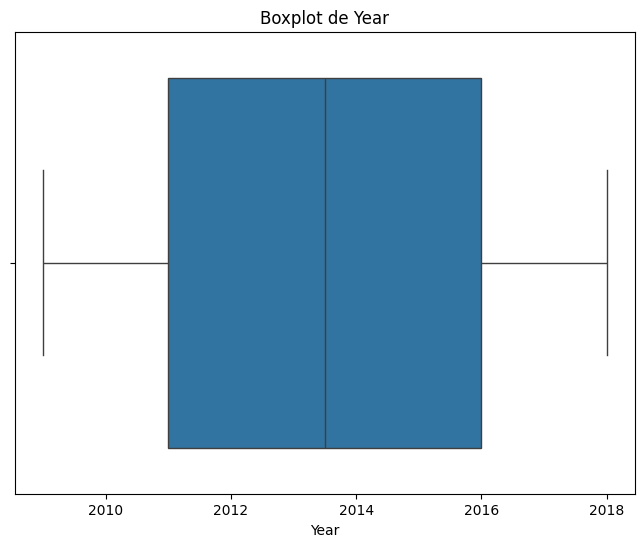

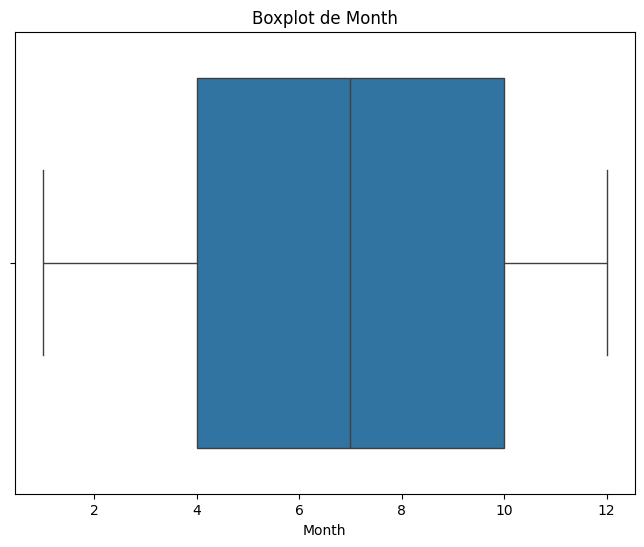

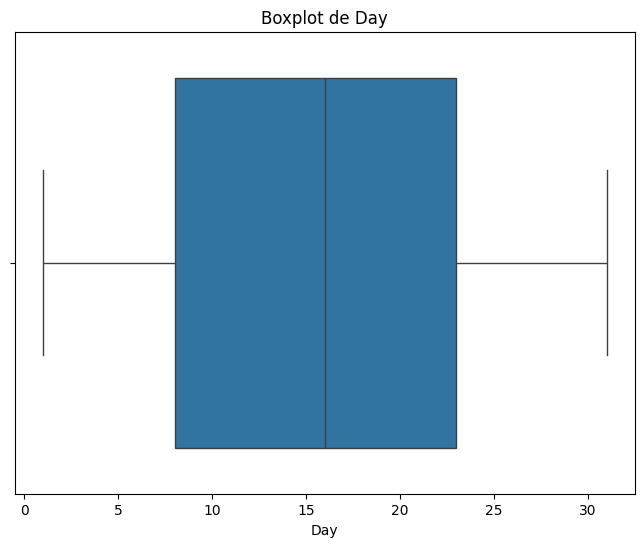

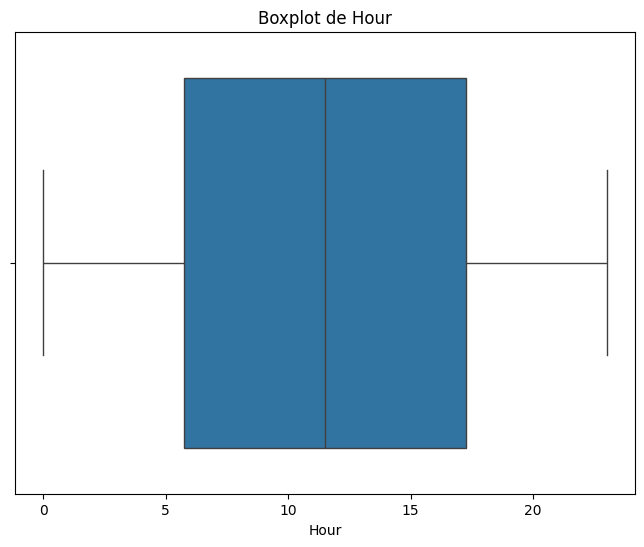

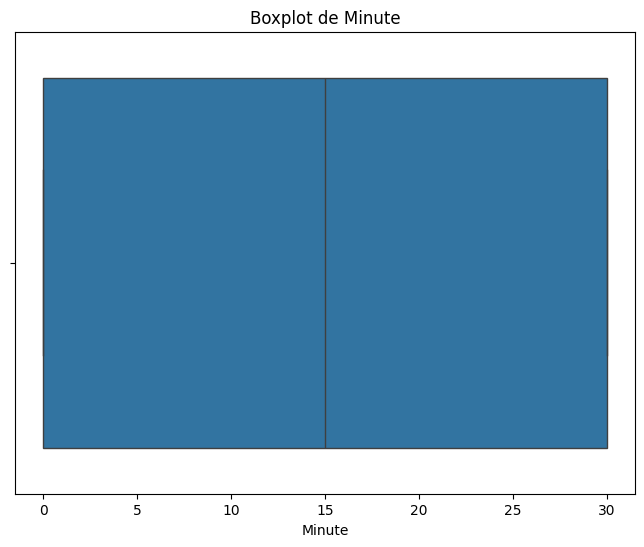

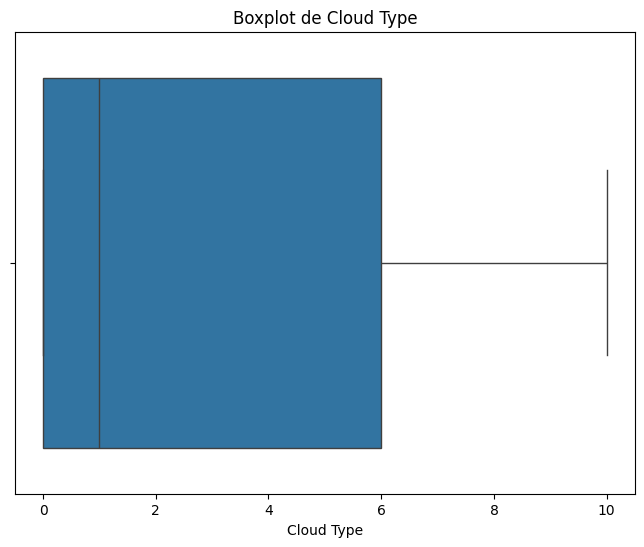

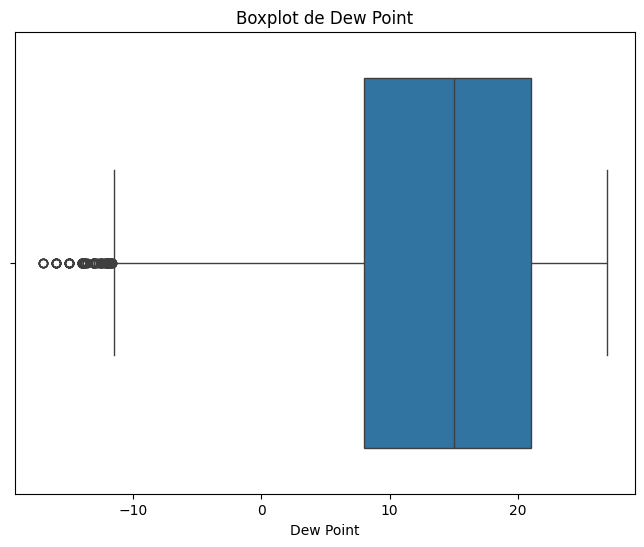

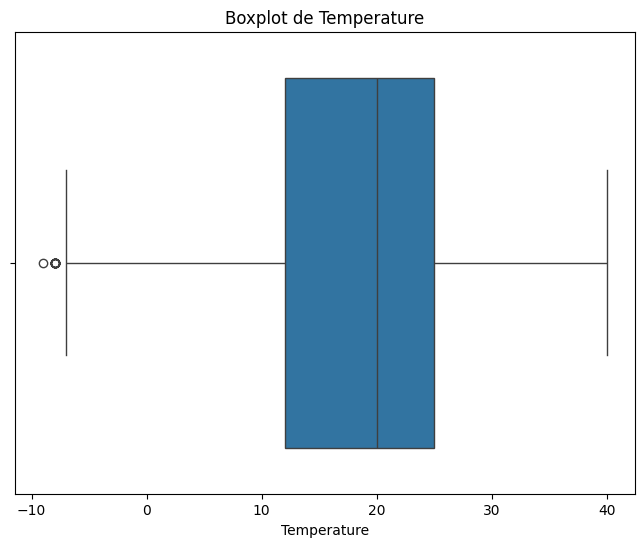

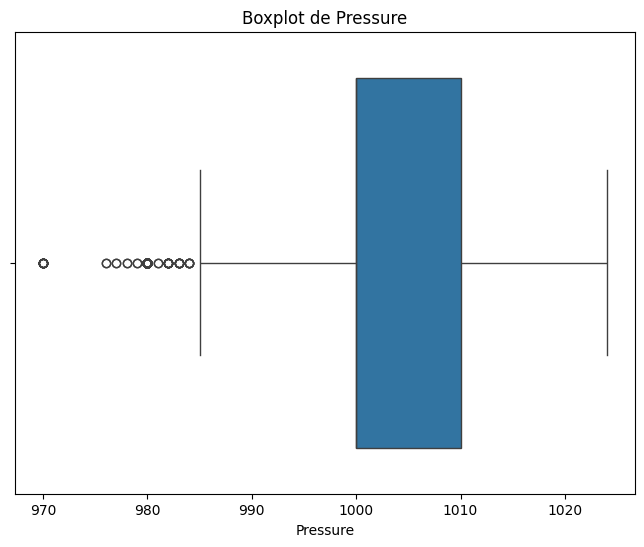

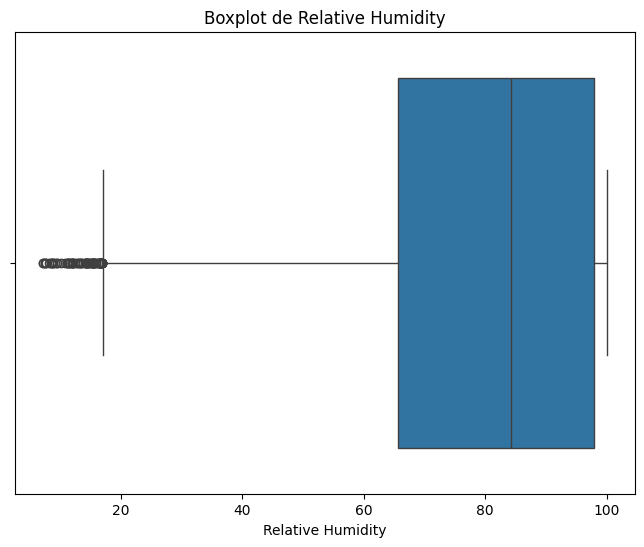

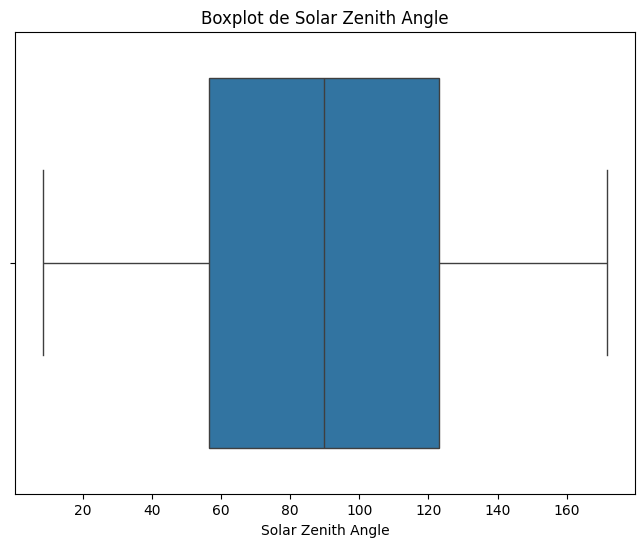

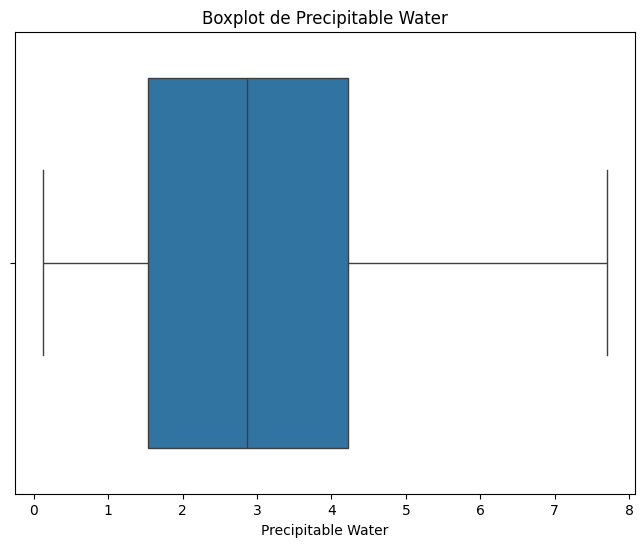

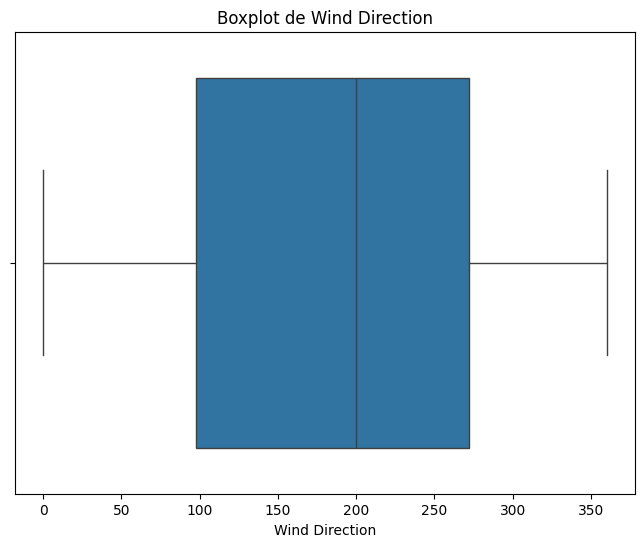

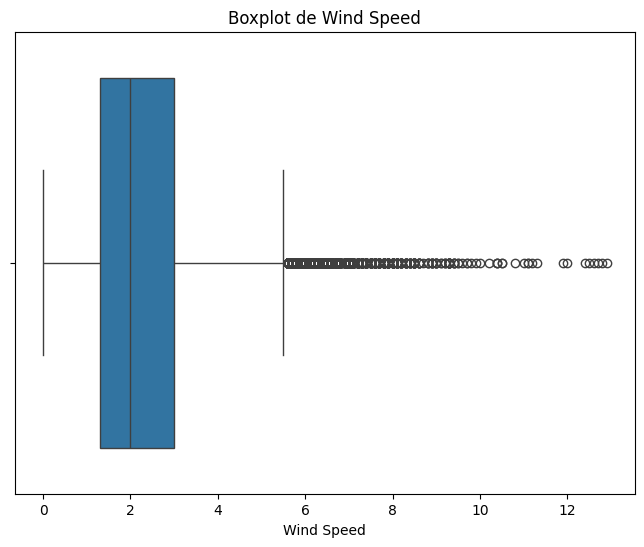

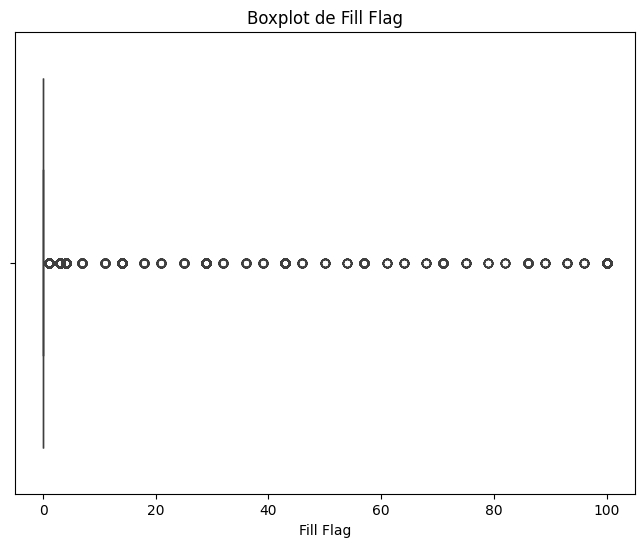

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables objetivo para excluirlas
target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Seleccionar las columnas numéricas, excluyendo las variables objetivo
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in target_columns]

# Generar un boxplot para cada variable
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


A través de los gráficos, se podría identificar a priori que las siguientes variables tienen outliers:
- Dew Point
- Temperature
- Pressure
- Relative Humidity
- Wind Speed
- Fill Flag


In [16]:
import pandas as pd

# Definir las variables objetivo para excluirlas
target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Seleccionar las columnas numéricas, excluyendo las variables objetivo
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in target_columns]

# Función para calcular los outliers usando IQR
def calculate_iqr_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return lower_bound, upper_bound, outliers.shape[0]

# Calcular el IQR y el número de outliers para cada variable
iqr_summary = {}

for col in numerical_columns:
    lower_bound, upper_bound, outlier_count = calculate_iqr_outliers(df_train, col)
    iqr_summary[col] = {
        'IQR Lower Bound': lower_bound,
        'IQR Upper Bound': upper_bound,
        'Number of Outliers': outlier_count
    }

# Convertir el resumen en un DataFrame para visualizar mejor
iqr_summary_df = pd.DataFrame(iqr_summary).T
iqr_summary_df


,IQR Lower Bound,IQR Upper Bound,Number of Outliers
Year,2003.5000,2023.5000,0.0
Month,-5.0000,19.0000,0.0
Day,-14.5000,45.5000,0.0
Hour,-11.5000,34.5000,0.0
Minute,-45.0000,75.0000,0.0
Cloud Type,-9.0000,15.0000,0.0
Dew Point,-11.5000,40.5000,214.0
Temperature,-7.5000,44.5000,19.0
Pressure,985.0000,1025.0000,165.0
Relative Humidity,17.0500,146.4900,80.0


Cómo es posible observar, existen varias variables con cantidad de outliers

1.3.1. Tratamiento de la variable "Dew Point"


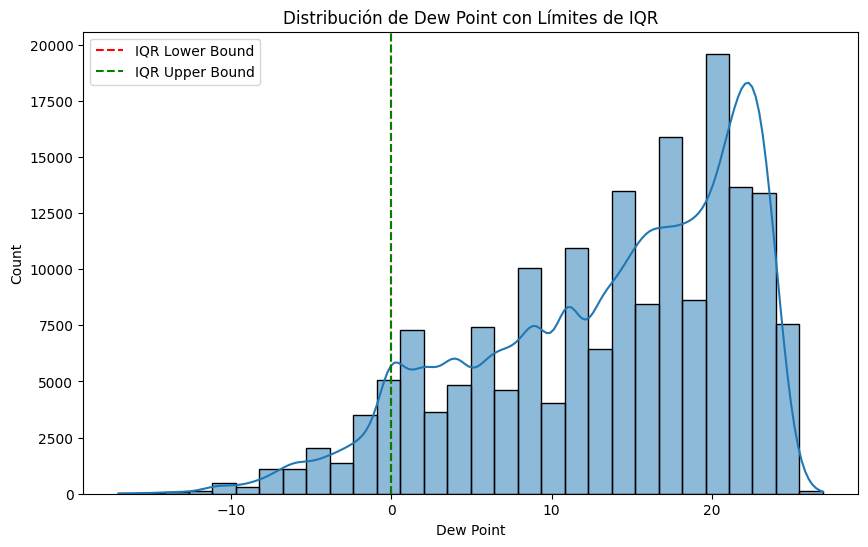

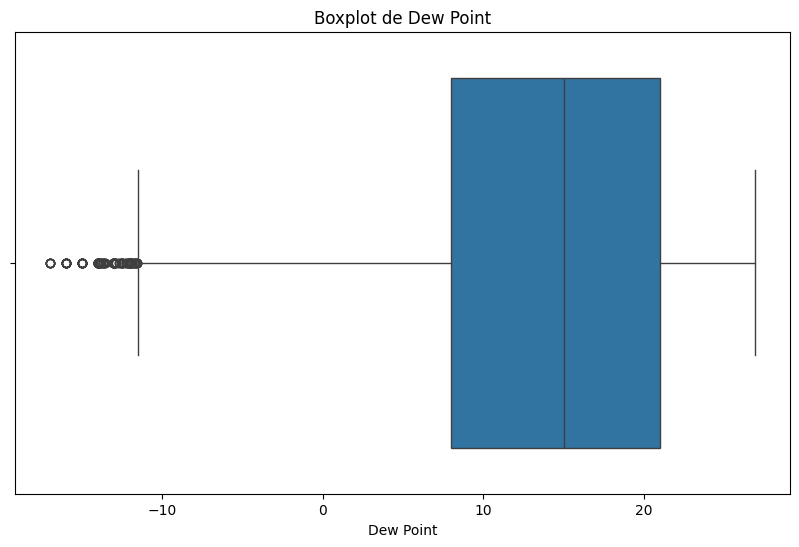

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Dew Point'], bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='IQR Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='IQR Upper Bound')
plt.title('Distribución de Dew Point con Límites de IQR')
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Dew Point'])
plt.title('Boxplot de Dew Point')
plt.show()


Dado que los valores outliers de Dew Point corresponde a valores de -17°C, eso en la práctica si es posible, en climas muy fríos donde la temperatura del aire debe enfriarse a temperaturas extremas para condensarse en agua líquida. Por tanto, desde este punto de vista, los valores atípicos de esta variables se pueden considerar válidos. Por tanto, no se tratarán estos valores para esta variable, debido a que la proporción es muy baja y también a que se desarrollarán modelos no lineales para predecir las variables objetivos.

1.3.2. Tratamiento de la variable "Temperature"

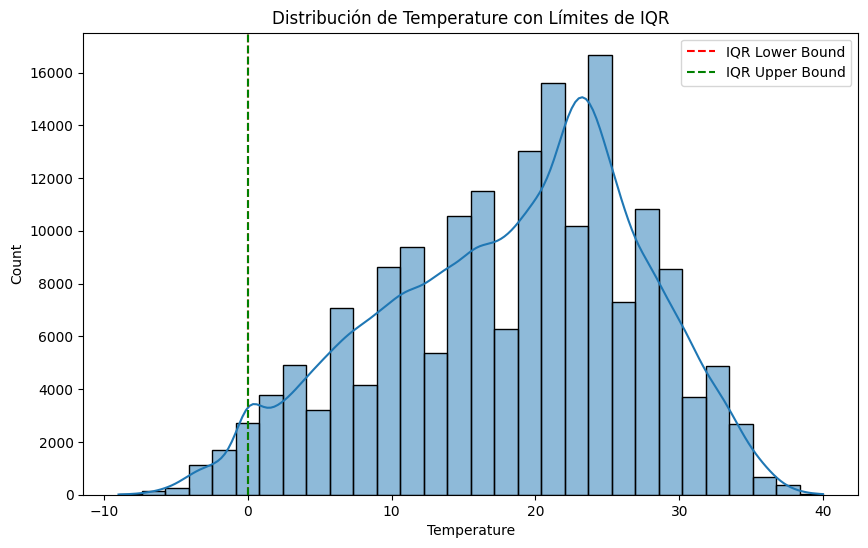

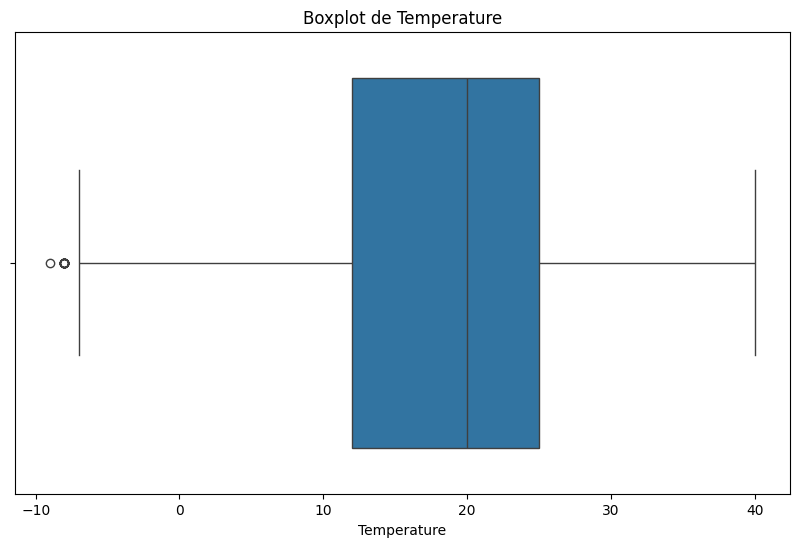

In [18]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Temperature'], bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='IQR Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='IQR Upper Bound')
plt.title('Distribución de Temperature con Límites de IQR')
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Temperature'])
plt.title('Boxplot de Temperature')
plt.show()


Para el caso de la variable "Temperature", los valores atípicos corresponden a -9 (°C). De igual manera que con "Dew Point", desde el punto de vista teórico-práctico, estos son valores normales de temperatura. Por tanto, no se tratarán estos valores para esta variable, debido a que la proporción es muy baja y también a que se desarrollarán modelos no lineales para predecir las variables objetivos.

1.3.3. Tratamiento de la variable "Pressure"

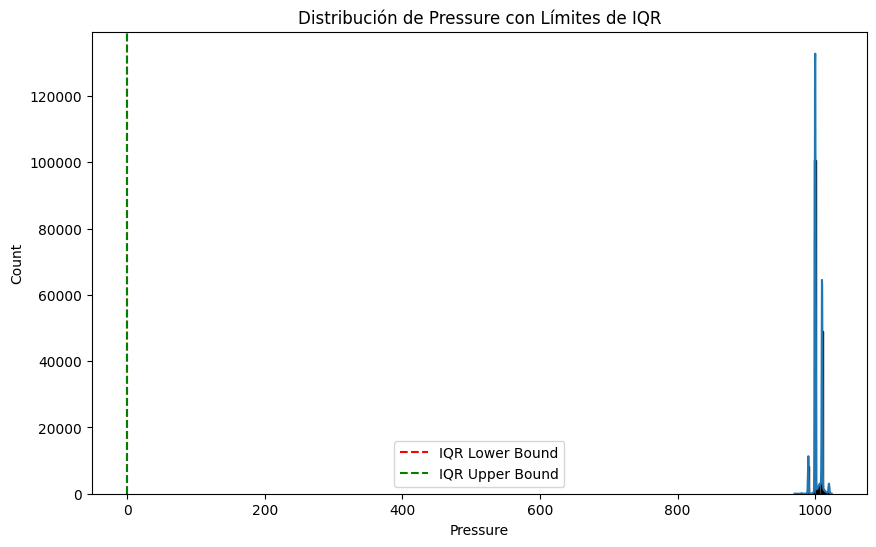

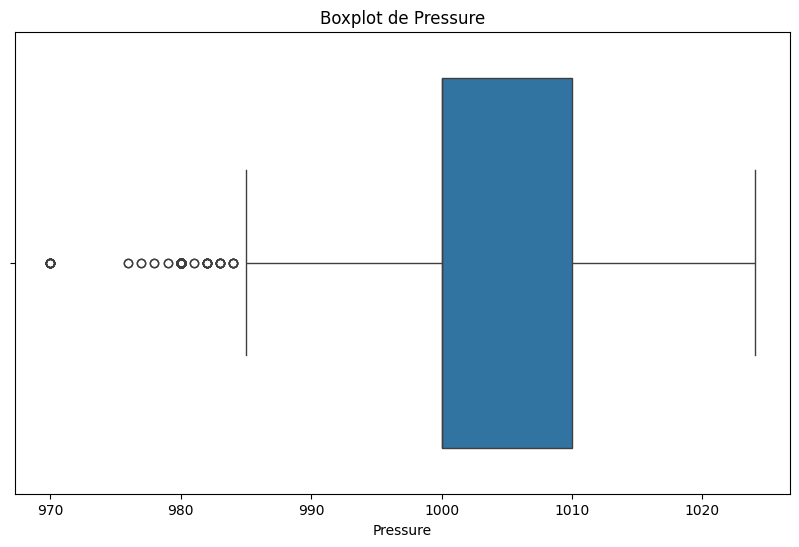

In [19]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Pressure'], bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='IQR Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='IQR Upper Bound')
plt.title('Distribución de Pressure con Límites de IQR')
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Pressure'])
plt.title('Boxplot de Pressure')
plt.show()


In [20]:
# Inspeccionar los valores más bajos y más altos de Pressure
print("Valores más bajos de Pressure:")
print(df_train['Pressure'].nsmallest(10))

print("\nValores más altos de Pressure:")
print(df_train['Pressure'].nlargest(10))

Valores más bajos de Pressure:
141304    970
141305    970
141306    970
152434    970
152435    970
152436    970
152437    970
152438    970
152439    970
152440    970
Name: Pressure, dtype: int64

Valores más altos de Pressure:
157850    1024
157851    1024
157852    1024
157853    1024
157854    1024
159003    1024
159004    1024
159005    1024
159006    1024
159007    1024
Name: Pressure, dtype: int64


Aparentemente, los valores extremos de Pressure están concentrados en un período de tiempo, dado que están en más de 1 registro de manera consecutiva. Analicemos ahora si estos valores s erelacionando con las otras variables para sacar conclusiones sobre si los valores son correctos o son anomalías

In [21]:
# Comparar con temperatura durante los valores bajos de presión
print(df_train[df_train['Pressure'] == 970][['Temperature', 'Wind Speed', 'Cloud Type']].describe())

# Comparar con temperatura durante los valores altos de presión
print(df_train[df_train['Pressure'] == 1024][['Temperature', 'Wind Speed', 'Cloud Type']].describe())


       Temperature  Wind Speed  Cloud Type
count    12.000000   12.000000   12.000000
mean     22.083333    8.925000    4.833333
std       0.668558    0.791001    1.749459
min      21.000000    8.000000    3.000000
25%      22.000000    8.425000    4.000000
50%      22.000000    8.700000    4.000000
75%      22.250000    9.300000    6.000000
max      23.000000   10.400000    8.000000
       Temperature  Wind Speed  Cloud Type
count    11.000000   11.000000   11.000000
mean      3.454545    4.109091    3.272727
std       7.880655    0.704918    3.319365
min      -5.700000    2.900000    0.000000
25%      -3.950000    3.650000    0.000000
50%       5.300000    4.500000    4.000000
75%      10.000000    4.650000    7.000000
max      14.600000    4.800000    7.000000


Al analizar la variable "Pressure" con las demás variables, en cuanto a los valores extremos, se puede decir que sí hay consistencia meteorológica. Los valores bajos de presión (970), que son los que se identificaron como outliers, coinciden con temperaturas altas, vientos fuertes y nubes densas y por tanto, es coherente con un sistema de baja presión (tormenta)
Por otrto lado, los valores altos de presión (1024), coinciden con temperaturas bajas, viento débil y cielos despejados (condiciones de alta presión)

Dado lo anteriormente mencionado, se concluye que los valores de outliers para esta variable son valores normales y no atípicos. No se tratarán estos valores para esta variable, debido a que la proporción es muy baja y también a que se desarrollarán modelos no lineales para predecir las variables objetivos.

1.3.4. Tratamiento de la variable "Relative Humidity"

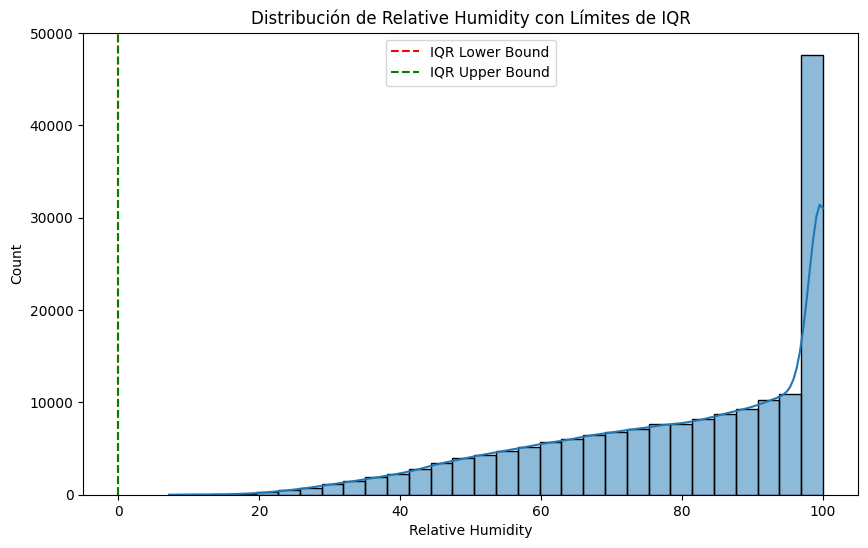

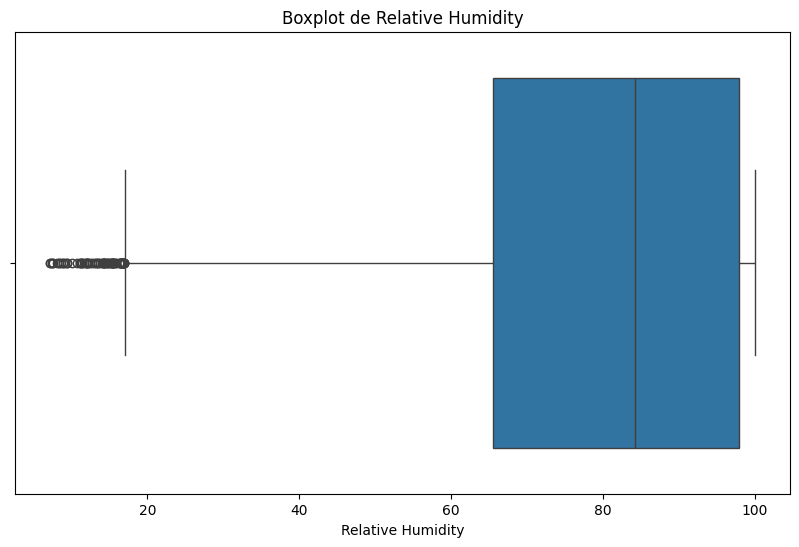

In [22]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Relative Humidity'], bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='IQR Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='IQR Upper Bound')
plt.title('Distribución de Relative Humidity con Límites de IQR')
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Relative Humidity'])
plt.title('Boxplot de Relative Humidity')
plt.show()

In [23]:
# Inspeccionar los valores más bajos y más altos de Relative Humidity
print("Valores más bajos de Relative Humidity:")
print(df_train['Relative Humidity'].nsmallest(10))

print("\nValores más altos de Relative Humidity:")
print(df_train['Relative Humidity'].nlargest(10))

Valores más bajos de Relative Humidity:
138326    7.19
138327    7.19
138324    7.46
138325    7.46
138328    7.61
138329    8.10
138322    8.42
138323    8.42
138280    8.64
138282    8.87
Name: Relative Humidity, dtype: float64

Valores más altos de Relative Humidity:
62    100.0
63    100.0
66    100.0
67    100.0
68    100.0
69    100.0
70    100.0
71    100.0
72    100.0
73    100.0
Name: Relative Humidity, dtype: float64


Los valores de humedad relativa tan bajos parecen muy raros. Se podrían dar en la realidad eventualmente, frente a fenómenos climáticos muy particulares. No obstante, analicemos estos outliers en contexto con los valores de las otras variables para esos registros

In [24]:
# Comparar con otras variables durante los valores bajos de humedad relativa
print(df_train[df_train['Relative Humidity'] <= 10][['Temperature', 'Wind Speed', 'Cloud Type']].describe())

# Comparar con otras variables durante los valores altos de humedad relativa (puedes ajustar el umbral si es necesario)
print(df_train[df_train['Relative Humidity'] >= 90][['Temperature', 'Wind Speed', 'Cloud Type']].describe())



       Temperature  Wind Speed  Cloud Type
count    14.000000   14.000000        14.0
mean     17.785714    4.042857         0.0
std       1.121714    0.405186         0.0
min      16.000000    3.100000         0.0
25%      17.000000    3.925000         0.0
50%      18.000000    4.100000         0.0
75%      19.000000    4.275000         0.0
max      19.000000    4.500000         0.0
        Temperature    Wind Speed    Cloud Type
count  70937.000000  70937.000000  70937.000000
mean      15.586140      2.065815      3.176495
std        7.088034      1.181847      3.102385
min       -9.000000      0.000000      0.000000
25%       10.000000      1.200000      0.000000
50%       17.000000      1.800000      3.000000
75%       22.000000      2.600000      7.000000
max       29.000000     12.900000     10.000000


Analizando los valore bajos y altos de humedad relativa en contexto con las otras variables, desde el punto de vista estadístico, se puede decir que si hay consonancia de estos valores aparentemente "outliers". Condiciones de baja humedad relativa ("outliers") se asocian con temperaturas más altas y cielos despejados (nube tipo 0), lo que es común en climas áridos.
Dado lo anterior, es que de momento no se va a eliminar ni tratar estos outliers, dado que son datos correctos


1.3.5. Tratamiento de la variable "Wind Speed"

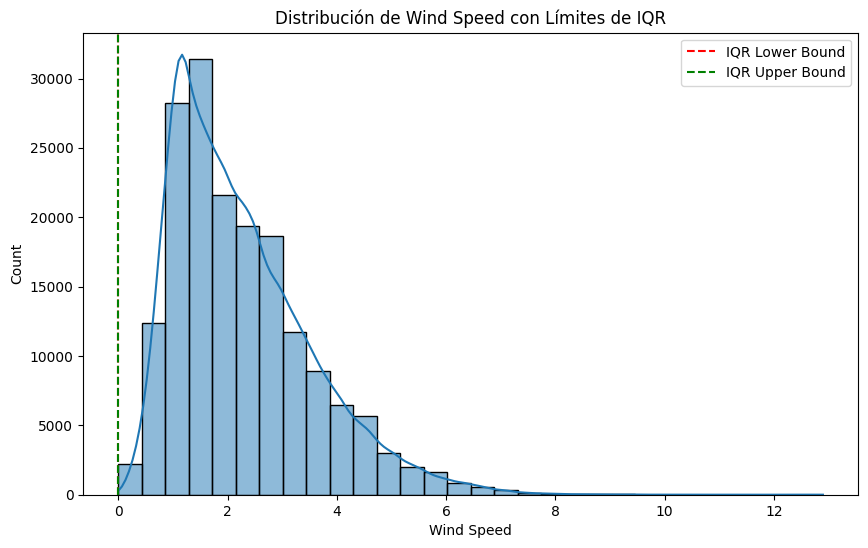

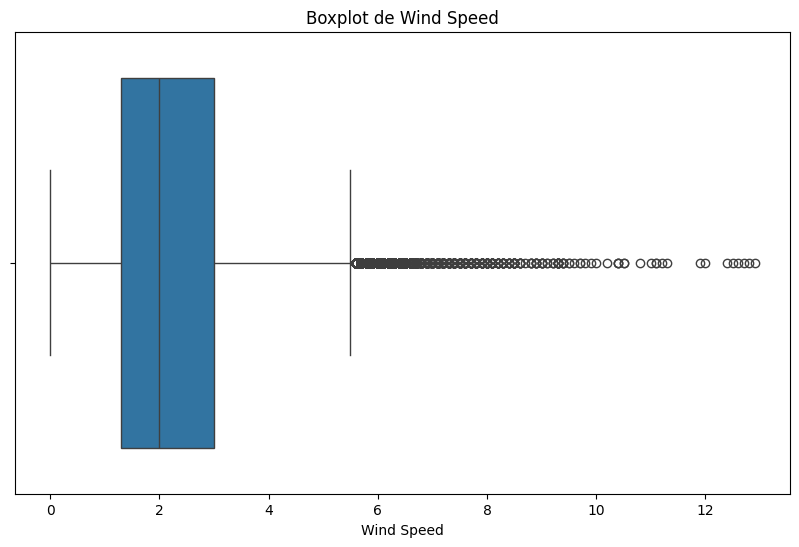

In [25]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Wind Speed'], bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='IQR Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='IQR Upper Bound')
plt.title('Distribución de Wind Speed con Límites de IQR')
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Wind Speed'])
plt.title('Boxplot de Wind Speed')
plt.show()

In [26]:
# Inspeccionar los valores más bajos y más altos de Wind Speed
print("Valores más bajos de Wind Speed:")
print(df_train['Wind Speed'].nsmallest(10))

print("\nValores más altos de Wind Speed:")
print(df_train['Wind Speed'].nlargest(10))

Valores más bajos de Wind Speed:
70372     0.0
82538     0.0
105884    0.0
105885    0.0
146693    0.0
146694    0.0
146695    0.0
1194      0.1
9682      0.1
9683      0.1
Name: Wind Speed, dtype: float64

Valores más altos de Wind Speed:
152430    12.9
152429    12.8
152428    12.7
152427    12.6
152426    12.5
152431    12.4
152432    12.0
152425    11.9
152424    11.3
152433    11.2
Name: Wind Speed, dtype: float64


Analizando los valores altos y bajos de la variable velocidad del viento, es posible observar que los outliers detectados, están a la derecha de la distribución (es decir, para los valores altos). No obstante aquello, analizando estos valores, estos son valores normales de vientos en situaciones climáticas determinadas. No son valores anómalos ni tampoco que escapan de alguna realidad muy particular.
Dado lo anterior, y que el porcentaje de "outliers" para esta variable es aproximadamente el 2% del dataset, es que se van a mantener estos valores.

1.3.6. Tratamiento de la variable "Fill Flag"

Esta no es una variable en sí, sino que es un indicador de la calidad de los datos a través de distintas categorías.
Los valores 0 para esta variable indican que los datos fueron recopilados sin problemas y por tanto estarían correctos

In [27]:
# Revisar la distribución de los valores de Fill Flag


# Dataset de training
print(df_train['Fill Flag'].value_counts())




Fill Flag
0      164285
4        6864
1        2046
100       454
3         290
14        204
43        157
29        151
57        106
71         95
7          93
86         81
11         60
25         48
18         46
32         36
36         36
21         34
39         31
46         27
93         21
50         17
75         17
64         16
96         16
89         14
68         12
61         11
54         11
79          9
82          8
Name: count, dtype: int64


In [28]:
# Dataset de test
print(df_test['Fill Flag'].value_counts())

Fill Flag
0      15670
100      375
14       196
29       150
4        147
43       141
7        110
57       107
71        98
86        71
11        69
18        50
21        48
36        28
39        27
25        25
32        23
50        20
68        19
93        18
46        18
75        17
82        16
64        16
79        15
54        14
89        13
61        11
96         8
Name: count, dtype: int64


Tal como es posible observar, la gran mayoría de los datos están en la categoría 0 de datos bien recolectados y sin problemas. No obstante, existen unas categorías que no estan descritas en el dataset, como lo son los valores superiores a 5

Analicemos a través del código a continuación de qué manera afectan estos valores "raros" de Fill Flag a las variables objetivos:

In [29]:
# Analizar cómo afectan los valores de Fill Flag a otras variables clave
print(df_train.groupby('Fill Flag')[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']].describe())

          Clearsky DHI                                                   \
                 count       mean        std   min    25%   50%     75%   
Fill Flag                                                                 
0             164285.0  52.854570  65.004857   0.0   0.00   0.0  104.00   
1               2046.0  15.982405  39.949145   0.0   0.00   0.0    0.00   
3                290.0  99.500000  39.175963  30.0  73.00  92.0  119.75   
4               6864.0  66.966638  50.065944   1.0  29.00  53.0   92.00   
7                 93.0  83.838710  44.818060   1.0  51.00  88.0  110.00   
11                60.0  83.633333  50.319308   2.0  46.75  84.0  123.00   
14               204.0  48.857843  47.195792   0.0   2.00  53.0   84.00   
18                46.0  69.673913  43.370269   4.0  35.00  69.5   95.25   
21                34.0  65.500000  36.137155   6.0  35.75  73.0   88.75   
25                48.0  76.458333  46.954917   3.0  38.50  71.0  115.75   
29               151.0  4

Dado que la "variable" en sí no es una variable, sino más bien un indicador de los datos, y dado también que la gran mayoría de los datos tienen parámetros normales de recolección, es que se va a proceder a eliminar la variable de ambos dataset

In [30]:
df_train = df_train.drop(columns=['Fill Flag'])
df_test = df_test.drop(columns=['Fill Flag'])

## **2. Pre-procesado** 

**Identificación de posibles correlaciones entre las variables**

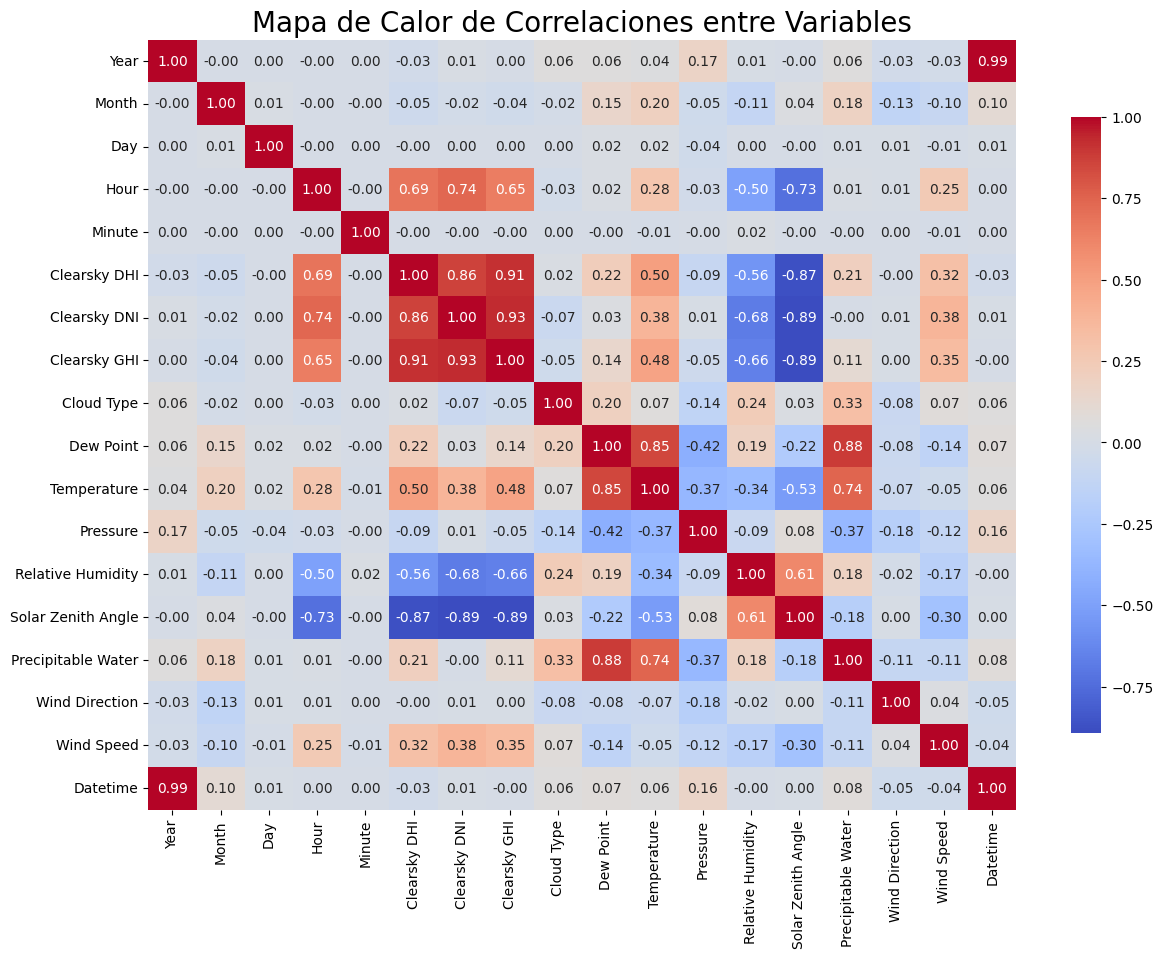

In [31]:
# Matriz de correlación
corr_matrix = df_train.corr()

# Mapa de calor de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de Correlaciones entre Variables', fontsize=20)
plt.show()


De la matriz de correlación, es posible concluir las siguientes correlaciones **importantes**:

1. Temperature y Dew Point: 0,85 
2. Temperature y Precipitable Water: 0,74
3. Temperature y Solar Zenith Angle: -0,53
4. Precipitable Water y Dew Point: 0,88


De momento, si bien se idenificó que las variables "Precipitable Water" y "Dew Point" tiene una correlación muy alta, dado que desde el punto de vista teórico y considerando también que ambas representan aspectos diferentes de la humedad atmosférica, es que se optó por mantener ambas variables y no eliminar alguna de las dos

**No obstante lo anterior, se va a proceder a continuación a identificar algún tipo de multicolinealidad entre las variables que presentan un valor alto de correlación entre sí, a través del VIF ("Variance Inflation Factor")** 

In [32]:


# Seleccionar las variables más relevantes para el modelo
selected_features = df_train[['Temperature', 'Dew Point', 'Precipitable Water', 'Solar Zenith Angle']]

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Feature'] = selected_features.columns
vif_data['VIF'] = [variance_inflation_factor(selected_features.values, i) for i in range(len(selected_features.columns))]

# Mostrar resultados
print(vif_data)


              Feature        VIF
0         Temperature  13.907715
1           Dew Point  24.671301
2  Precipitable Water  19.838323
3  Solar Zenith Angle   2.484314


Dado los valores altos de VIF obtenidos para algunas de esas variables, existen 2 opciones:
1. Combinar las variables más correlacionadas entre sí en una sola, y eliminar las originales, a través de alguna técnica, como podría ser PCA.
2. Mantener las variables originales, entendiendo que a pesar de que estén muy correlacionadas, capturan aspectos físicos y meteorológicos distintos de las variables a predecir

En este caso, suena tentador agrupar Dew Point y Precipitable Water en una sola variable. No obstante, dado que ambas variables si bien son similares, capturan un componente atmosférico distinto entre sí. Entiendo aquello, las dos variables se consideran a priori importantes para predecir las 3 variables objetivos. Es por esta razón que se optará por no combinarlas, ni tampoco eliminarlas. Sino, mantenerlas

## **Escalado de los datos**

Se probará con el dataset con los datos escalados y otros con los datos no escalado

Dataset de training:

In [33]:


# Identificar las columnas de tipo datetime64
datetime_cols = df_train.select_dtypes(include=['datetime64']).columns

# Separar las características numéricas y las variables objetivo
X = df_train.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'] + list(datetime_cols))
y = df_train[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

# Crear una copia del dataset original (no escalado)
df_train_unscaled = df_train.copy()

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos escalados
df_train_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Agregar las columnas datetime y las variables objetivo al dataset escalado
df_train_scaled = pd.concat([df_train_scaled, df_train[datetime_cols].reset_index(drop=True), y.reset_index(drop=True)], axis=1)




Dataset de test:

In [34]:
# Identificar las columnas de tipo datetime64
datetime_cols_test = df_test.select_dtypes(include=['datetime64']).columns

# Separar las características numéricas
X_test = df_test.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'] + list(datetime_cols_test))

# Escalar las características numéricas utilizando el scaler ajustado con el dataset de training
X_test_scaled = scaler.transform(X_test)

# Crear un DataFrame con los datos escalados y agregar las columnas datetime
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
df_test_scaled = pd.concat([df_test_scaled, df_test[datetime_cols_test].reset_index(drop=True)], axis=1)



Veamos las variables que más aportarán al modelo, según la correlación que tienen con las 3 variables objetivo:

In [35]:

# Crear una matriz de correlación con valores absolutos
corr = abs(df_train_scaled.corr())

# Mostrar la correlación de las variables con respecto a 'Clearsky DHI', 'Clearsky DNI' y 'Clearsky GHI'
# y aplicar un gradiente de color para visualizar mejor
for target in ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']:
    print(f"Correlación de variables con respecto a {target}:")
    display(corr[[target]].sort_values(by=target, ascending=False).style.background_gradient(cmap='coolwarm'))
    print("\n")


Correlación de variables con respecto a Clearsky DHI:


,Clearsky DHI
Clearsky DHI,1.000000
Clearsky GHI,0.912991
Solar Zenith Angle,0.873421
Clearsky DNI,0.860988
Hour,0.688314
Relative Humidity,0.559766
Temperature,0.503409
Wind Speed,0.315655
Dew Point,0.222931
Precipitable Water,0.207504




Correlación de variables con respecto a Clearsky DNI:


,Clearsky DNI
Clearsky DNI,1.000000
Clearsky GHI,0.927926
Solar Zenith Angle,0.886323
Clearsky DHI,0.860988
Hour,0.738537
Relative Humidity,0.680471
Temperature,0.384353
Wind Speed,0.381162
Cloud Type,0.073302
Dew Point,0.033601




Correlación de variables con respecto a Clearsky GHI:


,Clearsky GHI
Clearsky GHI,1.000000
Clearsky DNI,0.927926
Clearsky DHI,0.912991
Solar Zenith Angle,0.891033
Relative Humidity,0.655765
Hour,0.650697
Temperature,0.478273
Wind Speed,0.349180
Dew Point,0.140420
Precipitable Water,0.108725


## **Modelado**

## 1. Regresión lineal (1 modelo)

In [36]:
# Identificar las columnas de tipo datetime64
datetime_cols = df_train_scaled.select_dtypes(include=['datetime64']).columns

# Excluir las columnas datetime64 del conjunto de características (X)
X = df_train_scaled.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'] + list(datetime_cols))
y = df_train_scaled[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = linear_model.predict(X_val)

# Evaluar el modelo
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Linear Regression - MSE: {mse}, R²: {r2}")


Linear Regression - MSE: 13202.047100871554, R²: 0.8219165097077695


## 2. XGBoost (1 modelo)

In [37]:
# Identificar las columnas de tipo datetime64
datetime_cols = df_train_scaled.select_dtypes(include=['datetime64']).columns

# Excluir las columnas datetime64 del conjunto de características (X)
X = df_train_scaled.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'] + list(datetime_cols))
y = df_train_scaled[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo XGBoost
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=5)

# Entrenar el modelo
xgboost_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgboost_model.predict(X_val)

# Evaluar el modelo
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"XGBoost - MSE: {mse}, R²: {r2}")


XGBoost - MSE: 565.9243708937937, R²: 0.9783129096031189


## 3. Random Forest (2 modelos)

*Modelo 1 (simple)*

In [38]:
# Identificar las columnas de tipo datetime64
datetime_cols = df_train_unscaled.select_dtypes(include=['datetime64']).columns

# Excluir las columnas datetime64 del conjunto de características (X)
X = df_train_unscaled.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'] + list(datetime_cols))
y = df_train_unscaled[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_val)

# Evaluar el modelo
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Random Forest - MSE: {mse}, R²: {r2}")


Random Forest - MSE: 483.39106676078745, R²: 0.9818317127886164


*Modelo 2 a través de una búsqueda de mejores hiperparámetros con Grid Search*

In [39]:
# Definir los hiperparámetros que deseas optimizar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [10, 20, 30, None],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras necesarias en un nodo hoja
    'max_features': ['sqrt', 'log2', None],  # Número de características a considerar para la mejor división
}

# Configurar el modelo de Random Forest con GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Realizar la búsqueda
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor MSE
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"Mejor MSE: {-grid_search.best_score_}")

# Utilizar el mejor modelo encontrado para hacer predicciones
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_val)

# Evaluar el mejor modelo
mse_best = mean_squared_error(y_val, y_pred_best)
r2_best = r2_score(y_val, y_pred_best)

print(f"Mejor Random Forest - MSE: {mse_best}, R²: {r2_best}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\faman\anaconda3\envs\TFM\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores Hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor MSE: 471.88854739412574
Mejor Random Forest - MSE: 430.52649663286394, R²: 0.9854512623772932


Tal como se puede observar, el Grid Search arrojó como resultado los mejores hiperparámetros a personalizar para obtener el mejor modelo Random Forest. En función de estos hiperparámetros, se va a proceder a entrenar el modelo y hacer las predicciones, con el fin de obtener las métricas de evaluación y así comparar el rendimiento de los modelos que se han entrenado y los que se entrenarán en los códigos siguientes

*Modelo 2 de Random Forest con hiperparámetros ajustados*

In [40]:
# Usar los mejores hiperparámetros encontrados
best_rf_model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = best_rf_model.predict(X_val)

# Evaluar el modelo
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Métricas de evaluación - MSE: {mse}, R²: {r2}")



Métricas de evaluación - MSE: 430.52649663286394, R²: 0.9854512623772932


## 4. Redes Neuronales Convolucionales: RNN (5 modelos)

## Modelo 1: RNN Básico con LSTM

Descripción:

Estructura:
2 capas LSTM de 50 unidades cada una.
Dropout de 0.2 después de cada capa LSTM.
Capa de salida densa para predecir las tres variables objetivo (Clearsky DHI, DNI, GHI).
Hiperparámetros:
Optimizador: Adam
Loss: MSE (Mean Squared Error)
Epochs: 20
Batch Size: 32

Epoch 1/20


C:\Users\faman\anaconda3\envs\TFM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4383/4383 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 121818.0234 - val_loss: 91196.3516
Epoch 2/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 87323.0469 - val_loss: 83354.7500
Epoch 3/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 83055.5312 - val_loss: 83165.9062
Epoch 4/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 68669.1875 - val_loss: 25272.4258
Epoch 5/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 20501.5488 - val_loss: 9571.7158
Epoch 6/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 8317.3965 - val_loss: 4274.8105
Epoch 7/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 4586.9448 - val_loss: 2835.9285
Epoch 8/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 3479.1973 - val_loss: 2053.7903
Epoch 9/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 2766.2554 - val_loss: 1407.2432
Epoch 10/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 2299.1233 - val_loss: 1205.2958
Epoch 11/20
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms

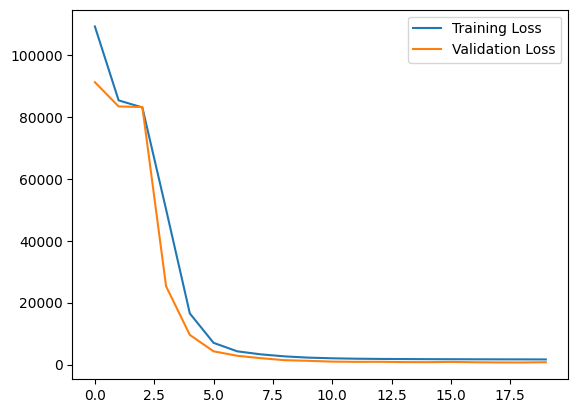

In [41]:
# Usar el dataset 'df'
dataset = df_train_unscaled.copy()

# Ordenar los datos por la nueva columna datetime
dataset = dataset.sort_values(by='Datetime')

# Eliminar las columnas originales de tiempo
dataset = dataset.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])

# Separar las características (X) y las variables objetivo (y)
X = dataset.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Datetime'])
y = dataset[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

# Normalizar los datos para mejorar el rendimiento de la RNN
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Crear secuencias temporales para la RNN
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y.values, time_steps)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Paso 5: Definir el modelo RNN usando LSTM
model = Sequential()

# Primera capa LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Segunda capa LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(units=y_train.shape[1]))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Paso 6: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Paso 7: Evaluar el modelo
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Paso 8: Hacer predicciones
predictions = model.predict(X_val)

# Calcular MSE y R² para cada variable objetivo
mse_dhi = mean_squared_error(y_val[:, 0], predictions[:, 0])
r2_dhi = r2_score(y_val[:, 0], predictions[:, 0])
print(f'Resultados para Clearsky DHI:\nMean Squared Error: {mse_dhi}\nR² Score: {r2_dhi}')

mse_dni = mean_squared_error(y_val[:, 1], predictions[:, 1])
r2_dni = r2_score(y_val[:, 1], predictions[:, 1])
print(f'Resultados para Clearsky DNI:\nMean Squared Error: {mse_dni}\nR² Score: {r2_dni}')

mse_ghi = mean_squared_error(y_val[:, 2], predictions[:, 2])
r2_ghi = r2_score(y_val[:, 2], predictions[:, 2])
print(f'Resultados para Clearsky GHI:\nMean Squared Error: {mse_ghi}\nR² Score: {r2_ghi}')

# Paso 10: Visualización opcional del entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## Modelo 2: RNN con Early Stopping


Descripción:

Estructura: Igual al Modelo 1.
Mejoras:
Se agregó Early Stopping para detener el entrenamiento si no se mejora el val_loss durante 10 épocas.
Hiperparámetros:
Optimizador: Adam
Loss: MSE
Epochs: Hasta 100 (detenido antes por Early Stopping)
Batch Size: 32
Callbacks: EarlyStopping (patience=10)


Implementación de Early Stopping que mejoró el Validation Loss al evitar el sobreajuste

Epoch 1/100


C:\Users\faman\anaconda3\envs\TFM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 121862.3047 - val_loss: 91231.5391
Epoch 2/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 87294.0938 - val_loss: 83360.0000
Epoch 3/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 83077.4844 - val_loss: 58161.0977
Epoch 4/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 39966.9531 - val_loss: 18456.3965
Epoch 5/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 15057.7314 - val_loss: 6925.4297
Epoch 6/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 6474.3721 - val_loss: 3505.9990
Epoch 7/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 4038.0601 - val_loss: 2292.7625
Epoch 8/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 3096.1736 - val_loss: 1641.0262
Epoch 9/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 2497.5598 - val_loss: 1206.4968
Epoch 10/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 2148.3279 - val_loss: 954.2267
Epoch 11/100
4383/4383 ━━━━━━━━━━━━━━━━━━━

1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 610.5869
Validation Loss: 622.5653686523438
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Resultados para Clearsky DHI:
Mean Squared Error: 277.82077173651544
R^2 Score: 0.9324847459793091
---
Resultados para Clearsky DNI:
Mean Squared Error: 1516.2499134097654
R^2 Score: 0.9889615178108215
---
Resultados para Clearsky GHI:
Mean Squared Error: 73.62480046952723
R^2 Score: 0.9993183016777039
---


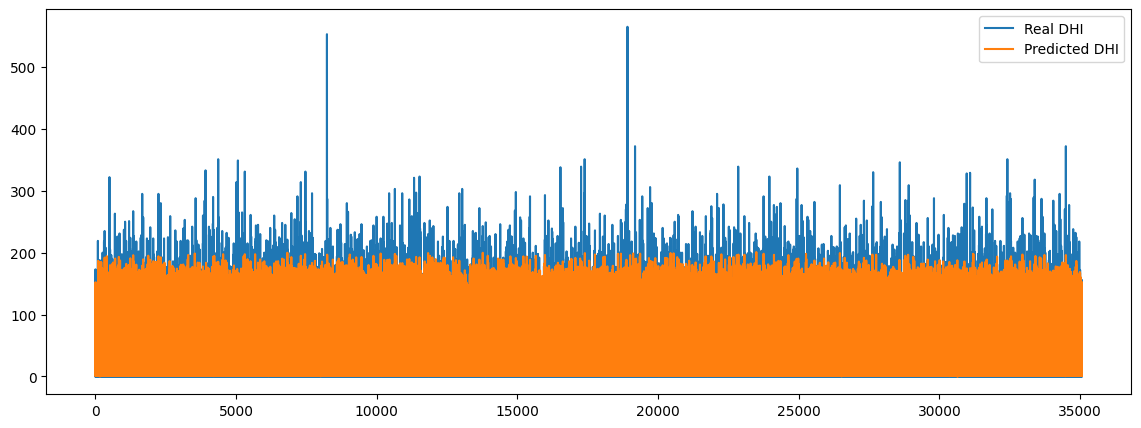

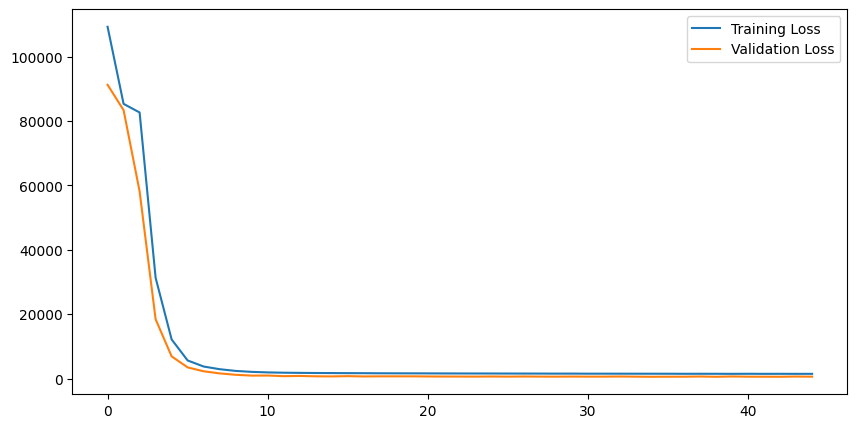

In [42]:
#Preparación del dataset
dataset = df_train_unscaled.copy()

# Ordenar los datos por la nueva columna datetime
dataset = dataset.sort_values(by='Datetime')

# Eliminar las columnas originales de tiempo
dataset = dataset.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])

# Separar las características (X) y las variables objetivo (y)
X = dataset.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Datetime'])
y = dataset[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

# Normalizar los datos para mejorar el rendimiento de la RNN
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Crear secuencias temporales para la RNN
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y.values, time_steps)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

#Definir el modelo RNN usando LSTM
model = Sequential()

# Primera capa LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Segunda capa LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(units=y_train.shape[1]))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

#Entrenar el modelo con Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

# Guardar el modelo
model.save('rnn_model2.h5')

#Evaluar el modelo
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

#Hacer predicciones
predictions = model.predict(X_val)

# Calcular métricas para cada variable objetivo
for i, target in enumerate(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']):
    mse = mean_squared_error(y_val[:, i], predictions[:, i])
    r2 = r2_score(y_val[:, i], predictions[:, i])
    print(f'Resultados para {target}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('---')

#Visualizar predicciones vs realidad para una de las variables (Clearsky DHI)
plt.figure(figsize=(14, 5))
plt.plot(y_val[:, 0], label='Real DHI')
plt.plot(predictions[:, 0], label='Predicted DHI')
plt.legend()
plt.show()

#Visualización del entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## Modelo 3:  RNN mejorado con Regularización L2

Descripción:

Estructura:
Primera capa LSTM con 100 unidades y regularización L2.
Segunda capa LSTM con 50 unidades.
Tercera capa LSTM con 50 unidades.
Dropout de 0.3 después de cada capa LSTM.
Capa de salida densa.
Mejoras:
Se implementó regularización L2 en la primera capa LSTM para combatir el sobreajuste.
Aumento de unidades LSTM en la primera capa y Dropout incrementado.
Hiperparámetros:
Optimizador: Adam
Loss: MSE
Epochs: Hasta 100 (detenido antes por Early Stopping)
Batch Size: 64
Callbacks: EarlyStopping (patience=10)

La regularización L2 ayudó a reducir el sobreajuste, mejorando el Validation Loss

Epoch 1/100


C:\Users\faman\anaconda3\envs\TFM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2192/2192 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 128967.8594 - val_loss: 107014.1094
Epoch 2/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 101208.0625 - val_loss: 90786.2344
Epoch 3/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 88194.8438 - val_loss: 84577.9531
Epoch 4/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 83909.2500 - val_loss: 83447.6484
Epoch 5/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 83448.2344 - val_loss: 83188.6641
Epoch 6/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 83209.4531 - val_loss: 83170.6094
Epoch 7/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 55086.4883 - val_loss: 29235.5449
Epoch 8/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 26401.5273 - val_loss: 17906.8340
Epoch 9/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 16457.0898 - val_loss: 10780.0400
Epoch 10/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 10427.8799 - val_loss: 6582.5625
Epoch 11/100
2192/2192 ━━━━━━

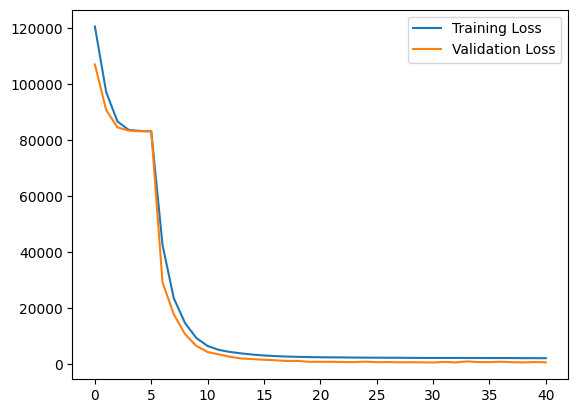

In [43]:
# Cargar y preparar los datos
dataset = df_train_unscaled.copy()

# Ordenar los datos por la nueva columna datetime
dataset = dataset.sort_values(by='Datetime')

# Eliminar las columnas originales de tiempo
dataset = dataset.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])

# Separar las características (X) y las variables objetivo (y)
X = dataset.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Datetime'])
y = dataset[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

# Normalizar los datos para mejorar el rendimiento de la RNN
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear secuencias temporales para la RNN
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y.values, time_steps)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Definir el modelo RNN mejorado usando LSTM
model = Sequential()

# Primera capa LSTM con regularización L2
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))

# Segunda capa LSTM
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

# Tercera capa LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))

# Capa de salida
model.add(Dense(units=y_train.shape[1]))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model0.keras', save_best_only=True, monitor='val_loss')

# Entrenar el modelo con callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint])



# Evaluar el modelo
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Hacer predicciones
predictions = model.predict(X_val)

# Calcular métricas para cada variable objetivo
for i, target in enumerate(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']):
    mse = mean_squared_error(y_val[:, i], predictions[:, i])
    r2 = r2_score(y_val[:, i], predictions[:, i])
    print(f'Resultados para {target}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('---')

# Visualización del entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## Modelo 4: RNN Mejorado con Regularización L2 y ReduceLROnPlateau

Descripción:

Estructura: Similar al Modelo 3.
Mejoras:
Se agregó ReduceLROnPlateau para ajustar la tasa de aprendizaje automáticamente cuando el Validation Loss se estabilizaba.
Hiperparámetros:
Optimizador: Adam
Loss: MSE
Epochs: Hasta 100 (detenido antes por Early Stopping)
Batch Size: 128
Callbacks: EarlyStopping (patience=15), ReduceLROnPlateau, ModelCheckpoint

Mejoras respecto al anterior:

ReduceLROnPlateau ayudó a mejorar aún más el Validation Loss, permitiendo un mejor ajuste al final del entrenamiento.**

Epoch 1/100


C:\Users\faman\anaconda3\envs\TFM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2191/2191 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - loss: 129331.9453 - val_loss: 107077.1172
Epoch 2/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 101724.9297 - val_loss: 90833.7266
Epoch 3/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 88589.1484 - val_loss: 84501.3047
Epoch 4/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 85331.0703 - val_loss: 83128.8125
Epoch 5/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 83408.5781 - val_loss: 82932.3281
Epoch 6/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 83390.6172 - val_loss: 82911.9844
Epoch 7/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 83011.2109 - val_loss: 55446.8242
Epoch 8/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 43214.9062 - val_loss: 26821.5957
Epoch 9/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 24931.6230 - val_loss: 16057.7656
Epoch 10/100
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 15725.2891 - val_loss: 9774.5391
Epoch 11/100
2191/2

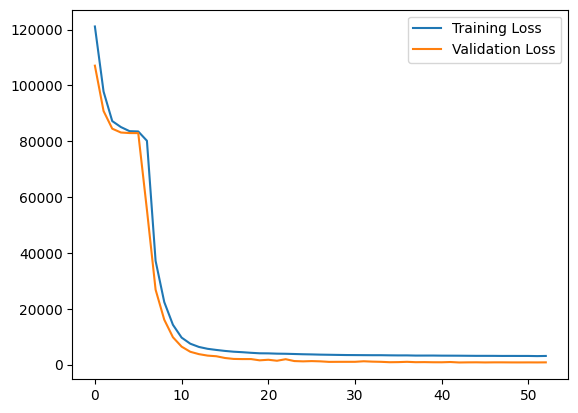

In [44]:
# Preparación de los datos
dataset = df_train_unscaled.copy()
dataset = dataset.sort_values(by='Datetime')
dataset = dataset.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
X = dataset.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Datetime'])
y = dataset[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

def create_sequences(X, y, time_steps=20):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y.values, time_steps=20)
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Definir el modelo
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(units=y_train.shape[1]))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Configurar callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint])

# Evaluación del modelo
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Hacer predicciones
predictions = model.predict(X_val)

# Calcular métricas para cada variable objetivo
for i, target in enumerate(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']):
    mse = mean_squared_error(y_val[:, i], predictions[:, i])
    r2 = r2_score(y_val[:, i], predictions[:, i])
    print(f'Resultados para {target}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('---')

# Visualización del entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## Modelo 5: RNN con pequeños ajustes adicionales en la arquitectura

Descripción:

Estructura:
Similar al Modelo 4.
Mejoras:
Ajuste en los valores de Dropout, unidades LSTM (bidireccional), y GRU para experimentar con diferentes configuraciones.
Hiperparámetros:
Optimizador: Adam
Loss: MSE
Epochs: Hasta 100 (detenido antes por Early Stopping)
Batch Size: 128
Callbacks: EarlyStopping (patience=10), ReduceLROnPlateau, ModelCheckpoint


Epoch 1/100


C:\Users\faman\anaconda3\envs\TFM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - loss: 136434.2188 - val_loss: 128837.4219
Epoch 2/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - loss: 125812.3125 - val_loss: 120007.1562
Epoch 3/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - loss: 117382.9844 - val_loss: 112508.9922
Epoch 4/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 110237.7266 - val_loss: 106064.4453
Epoch 5/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 104088.2031 - val_loss: 100548.3984
Epoch 6/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - loss: 98890.4531 - val_loss: 95921.8125
Epoch 7/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - loss: 94542.1953 - val_loss: 92135.7266
Epoch 8/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - loss: 91042.4219 - val_loss: 89142.9688
Epoch 9/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - loss: 88323.4297 - val_loss: 86888.1094
Epoch 10/100
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - loss: 86333.8203 - val_loss: 85280.8359
Epoch 11/10

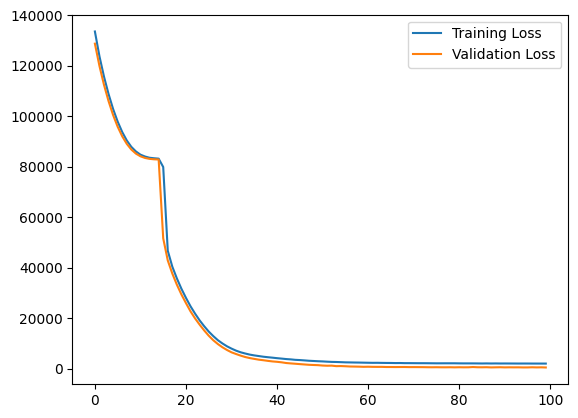

In [47]:
# Preparación de los datos
dataset = df_train_unscaled.copy()
dataset = dataset.sort_values(by='Datetime')
dataset = dataset.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
X = dataset.drop(columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Datetime'])
y = dataset[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

def create_sequences(X, y, time_steps=20):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y.values, time_steps=20)
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Definir el modelo
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=tf.keras.regularizers.l2(0.01))))
model.add(Dropout(0.3))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=y_train.shape[1]))

# Compilar el modelo con un learning rate ajustado
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse')

# Configurar callbacks para guardar el mejor modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint])

# Evaluación del modelo
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Guardar el modelo final entrenado
model.save('final_model.keras')

# Hacer predicciones
predictions = model.predict(X_val)

# Calcular métricas para cada variable objetivo
for i, target in enumerate(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']):
    mse = mean_squared_error(y_val[:, i], predictions[:, i])
    r2 = r2_score(y_val[:, i], predictions[:, i])
    print(f'Resultados para {target}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('---')

# Visualización del entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## Conclusiones modelados

## Predicción sobre el dataset de test original

A continuación se ejecuta el código para hacer las prediccones sobre el dataset de test  original, con el modelo 5, el cual se guardó en almacenó en la memoria local con el nombre de: "final_model.keras"

In [50]:
# Definir la función para crear secuencias solo con X (para test)
def create_sequences_test(X, time_steps=20):
    Xs = []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
    return np.array(Xs)

# Cargar el modelo guardado
loaded_model = load_model('final_model.keras')

# Eliminar las mismas columnas que en el conjunto de entrenamiento
X_test = df_test.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Datetime']).values

# Escalar los datos de test utilizando el mismo scaler que fue ajustado en el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Crear las secuencias a partir de los datos de test preprocesados
X_test_seq = create_sequences_test(X_test_scaled, time_steps=20)

# Hacer predicciones con el modelo cargado
predictions = loaded_model.predict(X_test_seq)

# Mostrar las predicciones para cada variable objetivo
for i, target in enumerate(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']):
    print(f'Predicciones para {target}:')
    print(predictions[:, i])
    print('---')




C:\Users\faman\anaconda3\envs\TFM\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predicciones para Clearsky DHI:
[2.1269197  2.2161098  2.2821174  ... 8.26814    0.4141407  0.92807484]
---
Predicciones para Clearsky DNI:
[  1.8352623   2.039814    2.2499733 ... 134.36642     2.491455
   1.0798645]
---
Predicciones para Clearsky GHI:
[ 0.03792953  0.18466377  0.324337   ... 15.010091   -3.4455814
 -3.36335   ]
---


Finalmente, a continuación se crea un dataframe con las predicciones y se almacena en un CSV:

In [53]:
# Crear un DataFrame con las predicciones
predictions_df = pd.DataFrame(predictions, columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'])

# Guardar el DataFrame como un archivo CSV
predictions_df.to_csv('predicciones_test.csv', index=False)

